In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [ ]:
import numpy as np
import os
import imutils
import cv2
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import pickle
from skimage.transform import resize
import time

from PIL import Image

In [ ]:
people = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','M01','M02','M03','M04','M05']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

In [ ]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

In [ ]:
MAX_WIDTH = 100
MAX_HEIGHT = 100

SEQUENCE_LENGTH = 22

VALIDATION_SPLIT = ['09']
TEST_SPLIT = ['05']

In [ ]:
print(os.getcwd()) # print working directory

/content/drive/MyDrive/Project-X-Lip-Reading


In [ ]:
sequence = []
for img_name in os.listdir('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/cropped/F01/words/03/01'):
    if not os.path.isdir(img_name):
        path = os.path.join('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/cropped/F01/words/03/01', img_name)
        image = imageio.imread(path)
        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
        image = 255 * image

        image = image.astype(np.uint8)
        sequence.append(image)
pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]
sequence.extend(pad_array * (SEQUENCE_LENGTH - len(sequence)))
sequence = np.array(sequence)

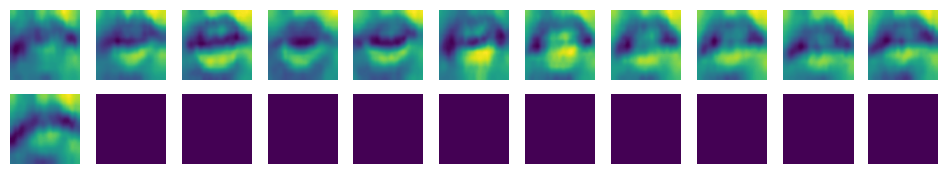

In [ ]:
def display_images(image_list):
    fig, axes = plt.subplots(2, 11, figsize=(12, 2))
    for i, img in enumerate(image_list):
        row, col = divmod(i, 11)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # Hide axes
    plt.show()

display_images(sequence)

In [ ]:
t1 = time.time()
for person_id in os.listdir('Dataset/cropped'):
    f_path = os.path.join('Dataset/cropped', person_id)
    if os.path.isdir(f_path):
        tx1 = time.time()
        for data_type in os.listdir(f_path):
            l_path = os.path.join(f_path, data_type)
            if os.path.isdir(l_path):
                for word_index, word in enumerate(os.listdir(l_path)):
                    w_path = os.path.join(l_path, word)
                    if os.path.isdir(w_path):
                        for iteration in os.listdir(w_path):
                            p_path = os.path.join(w_path, iteration)
                            if os.path.isdir(p_path):
                                sequence = []
                                for img_name in os.listdir(p_path):
                                    if not os.path.isdir(img_name):
                                        path = os.path.join(p_path, img_name)
                                        image = imageio.imread(path)
                                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                                        image = 255 * image

                                        # Convert to integer data type pixels.
                                        image = image.astype(np.uint8)
                                        sequence.append(image)
                                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]
                                sequence.extend(pad_array * (SEQUENCE_LENGTH - len(sequence)))
                                sequence = np.array(sequence)

                                if  iteration in TEST_SPLIT:
                                    X_test.append(sequence)
                                    y_test.append(word.split('0')[1])
                                elif iteration in VALIDATION_SPLIT:
                                    X_val.append(sequence)
                                    y_val.append(word.split('0')[1])
                                else:
                                    X_train.append(sequence)
                                    y_train.append(word.split('0')[1])
        tx2 = time.time()
        print(f'Splitted lip images for person {person_id}. Time taken : {tx2 - tx1} sec')

t2 = time.time()
print(f"Total time taken : {t2 - t1} sec")

Splitted lip images for person F01. Time taken : 36.18443274497986 sec
Splitted lip images for person F02. Time taken : 81.78524613380432 sec
Splitted lip images for person F04. Time taken : 138.19085717201233 sec
Splitted lip images for person F05. Time taken : 120.99060726165771 sec
Splitted lip images for person F06. Time taken : 124.38704633712769 sec
Total time taken : 501.5463263988495 sec


In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(107, 22, 100, 100)
(14, 22, 100, 100)
(13, 22, 100, 100)


In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(107,)
(14,)
(13,)


In [ ]:
def min_max_normalize(x):
    x_min = x.min(axis=(2, 3), keepdims=True)
    x_max = x.max(axis=(2, 3), keepdims=True)
    x = (x - x_min)/(x_max - x_min)
    x = np.nan_to_num(x) # handling nan values
    return x

# Normalizing the data.
X_train = min_max_normalize(X_train)
X_val = min_max_normalize(X_val)
X_test = min_max_normalize(X_test)

<ipython-input-15-0a9a1795bba2>:4: RuntimeWarning: invalid value encountered in divide
  x = (x - x_min)/(x_max - x_min)


In [ ]:
from keras.utils import to_categorical

# One hot encoding for the labels.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

In [ ]:
from sklearn.utils import shuffle

# Shuffling the data.
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/train/X_train.pkl', 'wb') as f:
  pickle.dump(X_train, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/train/y_train.pkl', 'wb') as f:
  pickle.dump(y_train, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/test/X_test.pkl', 'wb') as f:
  pickle.dump(X_test, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/test/y_test.pkl', 'wb') as f:
  pickle.dump(y_test, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/val/X_val.pkl', 'wb') as f:
  pickle.dump(X_val, f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/val/y_val.pkl', 'wb') as f:
  pickle.dump(y_val, f)